# Daten: Einlesen, Bereinigen & Visualisieren

## Das Gelernte anwenden.

Um nun die Erkenntnisse aus den bisherigen Workshopinhalten zu festigen, werden wir uns mit einem vollständig neuen Datensatz beschäftigen. Im konkreten Fall möchten wir es versuchen, mit dem gelernten Handwerkszeug ([Python 3.9.6](https://www.python.org/downloads/release/python-396/), [pandas](https://pandas.pydata.org/docs/) & [seaborn](https://seaborn.pydata.org/)) die 120-jährige Geschichte der modernen olympischen Spiele zu analysieren.

Die entsprechenden Informationen sind in zwei Dateien, `athlete_events.csv` sowie `noc_regions.csv`, abgelegt.
In den nachfolgenden beiden Tabellen sind die darin beschriebenen Spalten und die dazugehörige Spaltenbeschreibung einzusehen.

<table>
  <tr>
      <td colspan="2"><center><strong>athlete_events.csv</strong></center></td>
  </tr>
  <tr>
    <td><strong>Spalte</strong></td>
    <td><strong>Beschreibung</strong></td>
  </tr>
  <tr>
    <td>ID</td>
    <td>Einzigartige Identifikationsnummer für jede Athletin</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>Name einer Athletin</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>Geschlecht (codiert als M oder F)</td>
  </tr>
  <tr>
    <td>Alter</td>
    <td>Integer</td>
  </tr>
  <tr>
    <td>Height</td>
    <td>in cm</td>
  </tr>
  <tr>
    <td>Weight</td>
    <td>in kg</td>
  </tr>
  <tr>
    <td>Team</td>
    <td>Name des Teams</td>
  </tr>
  <tr>
    <td>NOC</td>
    <td>Buchstabencode für das nationale olympische Committee der Athletin</td>
  </tr>
  <tr>
    <td>Year</td>
    <td>Integer</td>
  </tr>
  <tr>
    <td>Season</td>
    <td>Codiert als Summer oder Winter</td>
  </tr>
  <tr>
    <td>City</td>
    <td>Austragungsort</td>
  </tr>
  <tr>
    <td>Sport</td>
    <td>Sportart</td>
  </tr>
  <tr>
    <td>Event</td>
    <td>Bewerbsbeschreibung innerhalb der Sportart</td>
  </tr>
  <tr>
    <td>Medal</td>
    <td>Gold, Silver, Bronze oder NA (wenn Athletin keine Medaille gemacht hat in diesem Bewerb)</td>
  </tr>
</table>

<hr>

<table>
  <tr>
      <td colspan="2"><center><strong>noc_regions.csv</strong></center></td>
  </tr>
  <tr>
    <td><strong>Spalte</strong></td>
    <td><strong>Beschreibung</strong></td>
  </tr>
  <tr>
    <td>NOC</td>
    <td>Buchstabencode für das nationale olympische Committee der Athletin</td>
  </tr>
  <tr>
    <td>Region</td>
    <td>Länderbezeichnung</td>
  </tr>
  <tr>
    <td>Notes</td>
    <td>zusätzliche Informationen</td>
  </tr>
</table>

### Aufgabe 0:
Nachdem wir uns mit den Spaltenbeschreibungen vertraut gemacht haben, lesen wir `athlete_events.csv` und `noc_regions.csv` per pandas in unser Notebook ein.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
df_athletes = pd.read_csv('../resources/data/athlete_events.csv')
df_regions = pd.read_csv('../resources/data/noc_regions.csv')

In [3]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
df_athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
df_athletes.describe(include='object')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


Alle folgenden Aufgaben können entweder mittels darstellen des gewünschten Ergebnisses in Form des DataFrames oder über das Generieren einer entsprechenden Abbildung gelöst werden.

### Aufgabe 1:
Wieviele einzigartige Athletinnen sind aufgezeichnet?

Bonusplot: Wieviele einzigartige Athletinnen aus einem beliebigen Land sind pro Jahr eingetragen?

In [6]:
df_athletes.drop_duplicates(subset=['ID']).groupby(['Sex']).size()

Sex
F     33981
M    101590
dtype: int64

In [11]:
# count of unique athletes from austria over years as plot
austrian_entries = df_athletes[df_athletes['NOC'] == 'AUT']

austrian_entries

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1738,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 100 metres Freestyle,NaN
1739,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze
1740,968,"Margarete ""Grete"" Adler",F,28.0,NaN,NaN,Austria,AUT,1924 Summer,1924,Summer,Paris,Diving,Diving Women's Plain High,NaN
1901,1048,Eduard Aellig,M,24.0,181.0,93.0,Austria,AUT,1972 Summer,1972,Summer,Munich,Judo,Judo Men's Half-Heavyweight,NaN
2142,1190,Simon Agoston,M,31.0,179.0,64.0,Austria,AUT,2008 Summer,2008,Summer,Beijing,Triathlon,Triathlon Men's Olympic Distance,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270900,135475,Liliana Teresa Zurowski,F,36.0,NaN,NaN,Austria,AUT,1992 Summer,1992,Summer,Barcelona,Handball,Handball Women's Handball,NaN
271005,135517,Fritz Zwazl,M,22.0,NaN,NaN,Austria,AUT,1948 Summer,1948,Summer,London,Swimming,Swimming Men's 100 metres Backstroke,NaN
271010,135521,Anton Zwerina,M,23.0,NaN,66.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver
271039,135540,David Zwilling,M,22.0,174.0,68.0,Austria,AUT,1972 Winter,1972,Winter,Sapporo,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN


In [12]:
austrian_entries = austrian_entries.drop_duplicates(subset=['ID', 'Year'])
austrian_entries

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1738,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 100 metres Freestyle,NaN
1740,968,"Margarete ""Grete"" Adler",F,28.0,NaN,NaN,Austria,AUT,1924 Summer,1924,Summer,Paris,Diving,Diving Women's Plain High,NaN
1901,1048,Eduard Aellig,M,24.0,181.0,93.0,Austria,AUT,1972 Summer,1972,Summer,Munich,Judo,Judo Men's Half-Heavyweight,NaN
2142,1190,Simon Agoston,M,31.0,179.0,64.0,Austria,AUT,2008 Summer,2008,Summer,Beijing,Triathlon,Triathlon Men's Olympic Distance,NaN
2637,1480,Franz Aigner,M,32.0,NaN,107.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Heavyweight,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270713,135383,Annelore Zckert (-Zrost),F,22.0,NaN,NaN,Austria,AUT,1948 Winter,1948,Winter,Sankt Moritz,Alpine Skiing,Alpine Skiing Women's Downhill,NaN
270900,135475,Liliana Teresa Zurowski,F,36.0,NaN,NaN,Austria,AUT,1992 Summer,1992,Summer,Barcelona,Handball,Handball Women's Handball,NaN
271005,135517,Fritz Zwazl,M,22.0,NaN,NaN,Austria,AUT,1948 Summer,1948,Summer,London,Swimming,Swimming Men's 100 metres Backstroke,NaN
271010,135521,Anton Zwerina,M,23.0,NaN,66.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver


In [14]:
sorted(austrian_entries['Year'].unique())

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

<IPython.core.display.Javascript object>


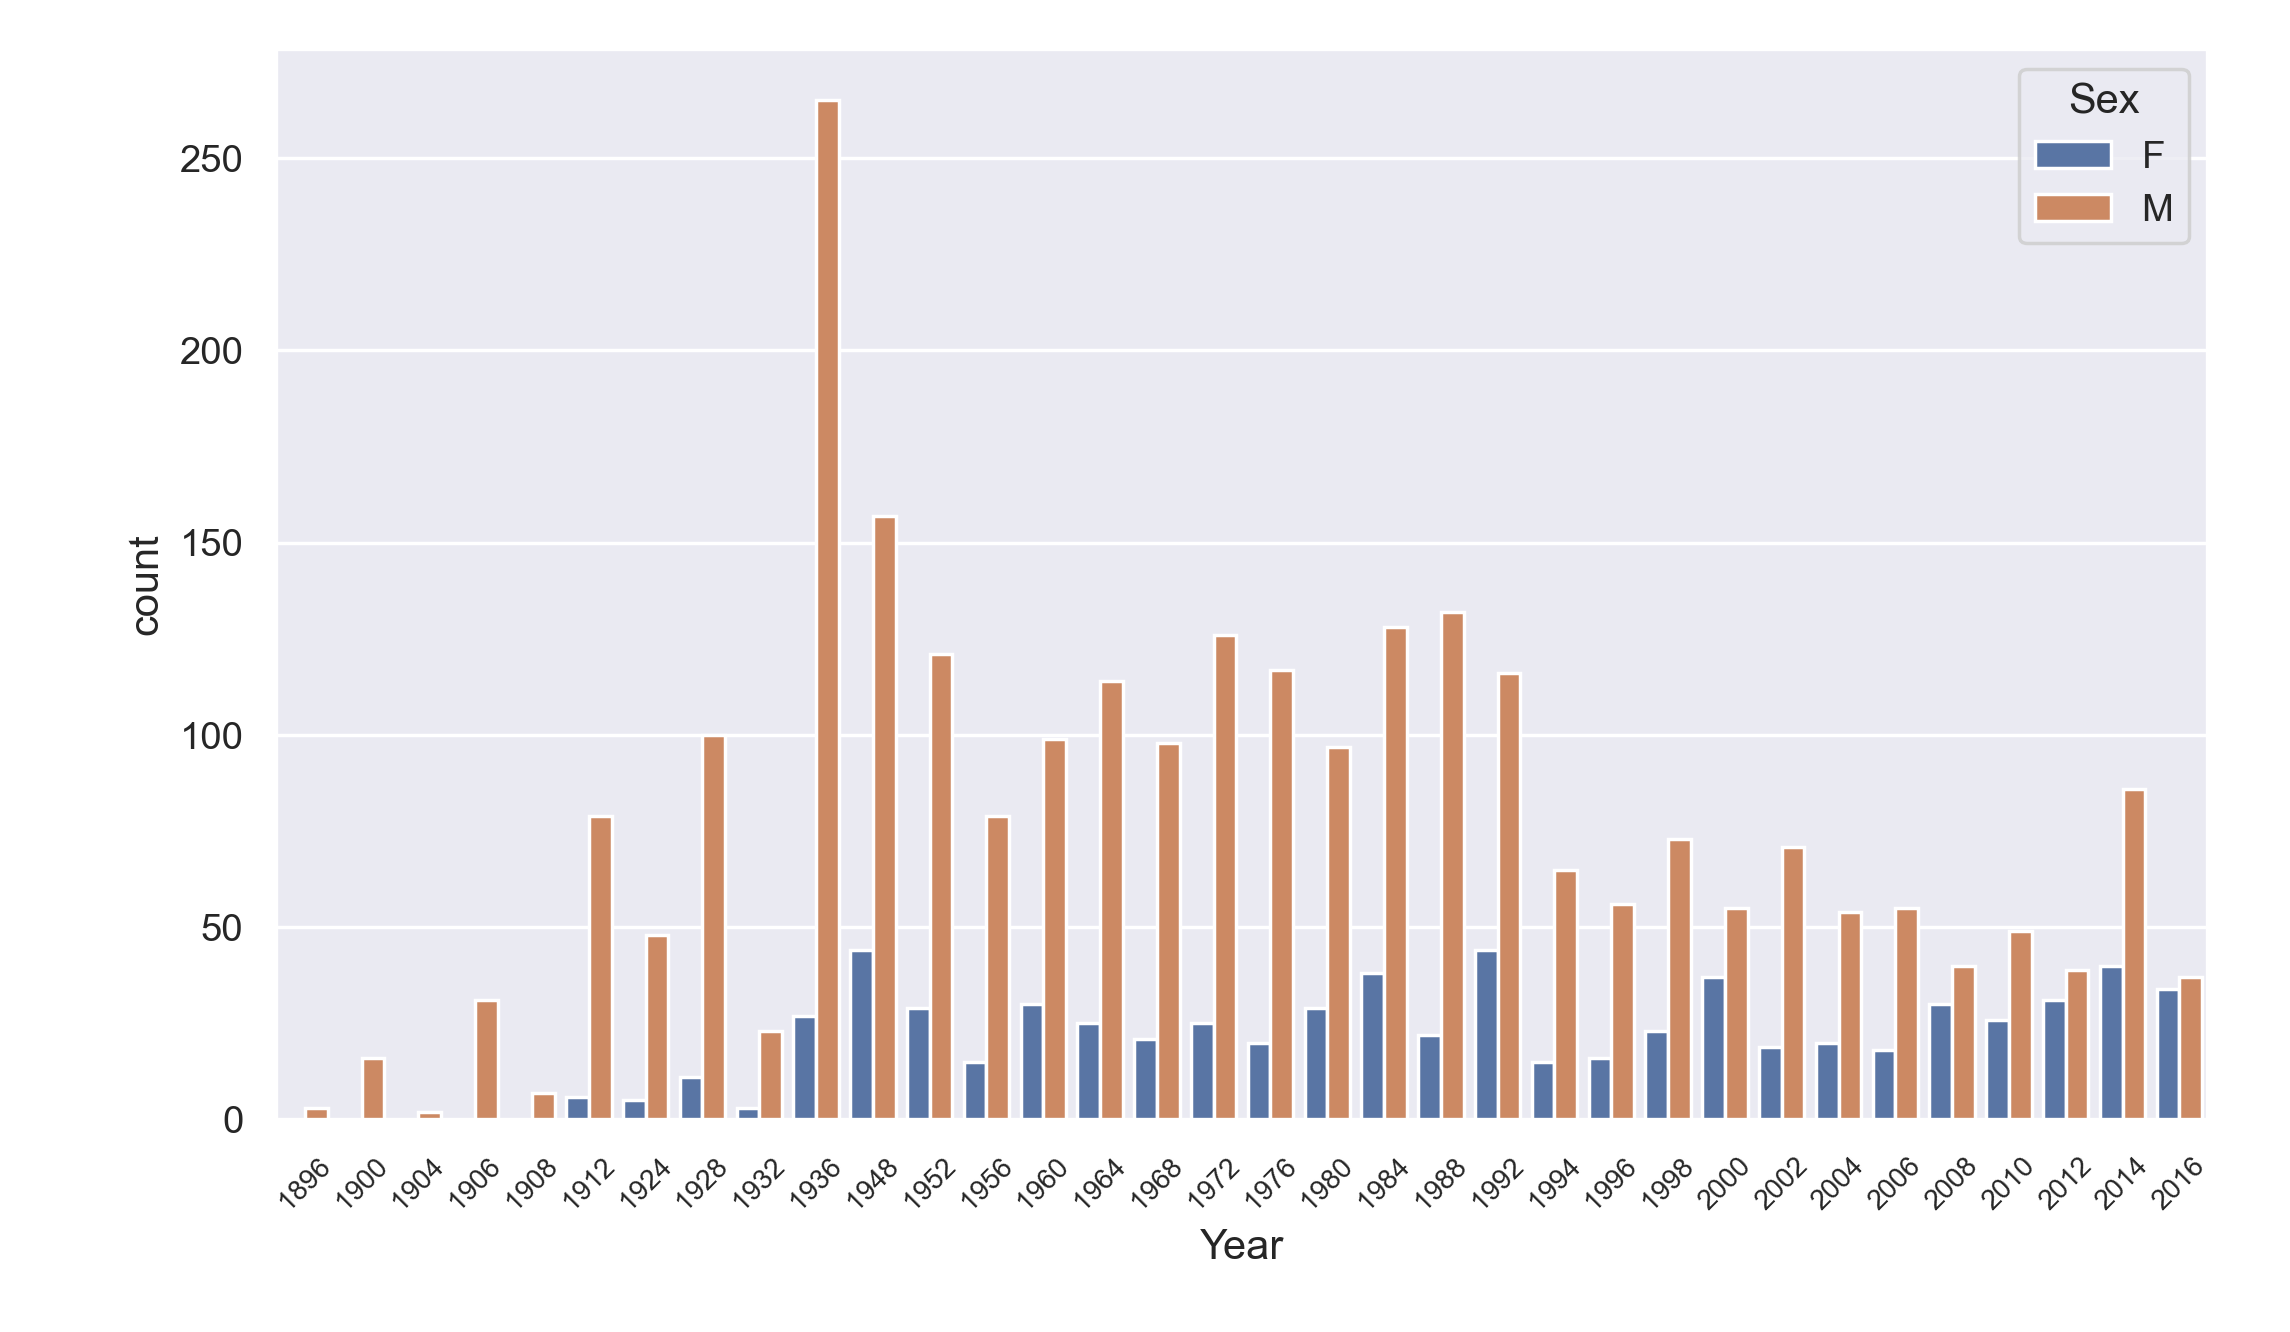

In [16]:
plt.figure()
sns.set_theme(style="darkgrid")
plt.tick_params(axis='x', labelsize=8, rotation=45)
sns.countplot(x="Year", data=austrian_entries, hue='Sex')
plt.tight_layout()

### Aufgabe 2:
Wie hoch ist die Anzahl unterschiedlicher Sportarten?

Bonusplot: An welchen Sportarten nahmen über die Jahre die meisten Athletinnen teil?

### Aufgabe 3:
Zeige die zehn schwersten sowie die zehn größten männlichen bzw. weiblichen Athletinnen.

Bonusplot: Erstelle einen Scatterplot von Größe vs. Gewicht für alle Athletinnen (coloriert nach Geschlecht!) eines beliebigen Landes dar.

### Aufgabe 4:
Wieviele unterschiedliche Bewerbe wurden erfasst?

Bonusplot: Wie ist das Verhältnis unterschiedlicher Bewerbe bei Sommerspielen zu Winterspielen?

### Aufgabe 5:
Wieviele weibliche Athletinnen nahmen bisher an den olympischen Spielen teil?

Bonusplot: Hat sich die Anzahl der Teilnehmerinnen olympischer Spiele über die Jahre erhöht?

### Aufgabe 6:
Wieviele männliche Athleten nahmen bisher an den olympischen Spielen teil?

Bonusplot: Wie sieht's mit der Anzahl der Teilnehmer olympischer Spiele über die Jahre aus?

### Aufgabe 7:
Wieviele Länder haben  Athletinnen zu den olympischen Spielen geschickt?

### Aufgabe 8:
Wieviele unterschiedliche Austragungsorte sind eingetragen?

### Aufgabe 9:
Wieviele Athletinnen haben zumindest eine Medaille gewonnen?

Bonusplot: Stelle die Verteilung der Größe und des Gewichts von Medaillengewinnerinnen in unterschiedlichen Sportarten als Boxplot dar.

### Aufgabe 10:
Welche Athletin hat die meisten Medaillen gewonnen?

Bonus: Zeige die Anzahl jener Athletinnen, die mehr als eine Medaille gewonnen haben.